In [77]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import jax

In [98]:
s11 = 0.5
s22 = 0.3
s12 = -0.3
cov = np.array([[s11,s12],[s12,s22]])
data = np.array([1.,0.])

covinv = np.linalg.inv(cov)

grid = np.mgrid[-5:5:101j,-5:5:101j]
mean = np.swapaxes(grid,0,-1).reshape(-1,2)

z = -jax.vmap(jax.scipy.stats.multivariate_normal.logpdf,in_axes=(None,0,None))(data,mean,cov)
z = z.reshape(101,101).T

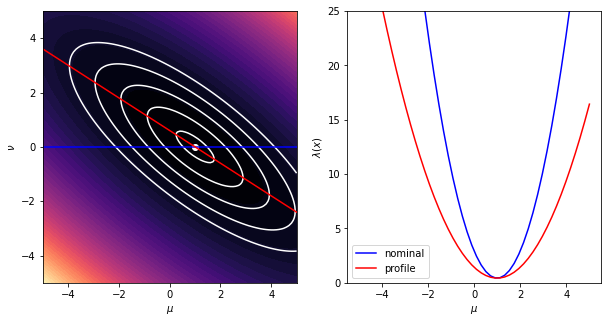

In [133]:

mus = np.linspace(-5,5)
nuhathat = covinv[0,1]/covinv[1,1]*(data[0]-mus)+data[1]


at_nominal = np.column_stack([mus,np.zeros_like(mus)])
at_profile = np.column_stack([mus,nuhathat])

f,axarr  = plt.subplots(1,2)
ax = axarr[0]
ax.contourf(grid[0],grid[1],z,levels  = 50, cmap = 'magma')
ax.contour(grid[0],grid[1],z,levels  = np.arange(1,6)**2, colors = 'w')
ax.scatter(data[0],data[1],c = 'w')

ax.plot(at_nominal[:,0],at_nominal[:,1], c = 'b')
ax.plot(at_profile[:,0],at_profile[:,1], c = 'r')
ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'$\nu$')


ax = axarr[1]
Lprofile = -jax.vmap(jax.scipy.stats.multivariate_normal.logpdf,in_axes=(None,0,None))(data,at_profile,cov)
Lnominal = -jax.vmap(jax.scipy.stats.multivariate_normal.logpdf,in_axes=(None,0,None))(data,at_nominal,cov)
ax.plot(mus,Lnominal, label = 'nominal', c  = 'b')
ax.plot(mus,Lprofile, label = 'profile', c = 'r')
ax.set_ylim(0,25)
ax.legend()
ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'$\lambda(x)$')

f.set_size_inches(10,5)
f.savefig('profilelhood.png')